In [64]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# TensorFlow / Keras functions
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

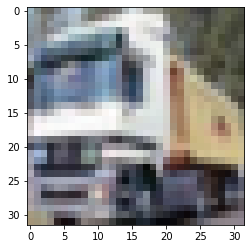

In [65]:
plt.imshow(X_train[1], plt.cm.binary)

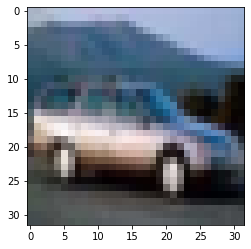

In [59]:
plt.imshow(X_train[4], plt.cm.binary)

In [60]:
print(y_train[1])
print(y_train[4])

[9]
[1]


In [66]:
car_truck_train = np.where((y_train == 1) | (y_train == 9))[0]
car_truck_test = np.where((y_test == 1) | (y_test == 9))[0]

Xtrain = X_train[car_truck_train]
ytrain = y_train[car_truck_train]

Xtest = X_test[car_truck_test]
ytest = y_test[car_truck_test]

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

Xtrain, Xvalid, ytrain, yvalid = train_test_split(Xtrain, ytrain, test_size=.5, stratify=ytrain, random_state=1)

print(Xtrain.shape, Xvalid.shape, Xtest.shape, ytrain.shape, yvalid.shape, ytest.shape)

(5000, 32, 32, 3) (5000, 32, 32, 3) (2000, 32, 32, 3) (5000, 1) (5000, 1) (2000, 1)


In [67]:
model1 = Sequential()
model1.add(Conv2D(16, kernel_size=(3,3), activation='relu',
                 padding='same', input_shape=(32,32,3)))
model1.add(MaxPooling2D(pool_size=(4, 4), strides=4))
model1.add(Flatten())
model1.add(Dense(10, activation='softmax'))

In [68]:
model1.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])
model1.fit(Xtrain, ytrain, epochs=10, batch_size=20,
           validation_data=(Xvalid, yvalid))
model1.evaluate(Xtest, ytest)

Epoch 1/10
  1/250 [..............................] - ETA: 42s - loss: 207.0495 - accuracy: 0.0000e+00

C:\Users\gragg\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\backend.py:4906: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  warnings.warn(


250/250 [==============================] - 1s 3ms/step - loss: 10.4823 - accuracy: 0.5930 - val_loss: 4.1869 - val_accuracy: 0.6300
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 3.3365 - accuracy: 0.6524 - val_loss: 2.5241 - val_accuracy: 0.6498
Epoch 3/10
250/250 [==============================] - 1s 3ms/step - loss: 1.8491 - accuracy: 0.6874 - val_loss: 1.4924 - val_accuracy: 0.6670
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 1.0661 - accuracy: 0.6910 - val_loss: 1.0787 - val_accuracy: 0.6572
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.7804 - accuracy: 0.6880 - val_loss: 0.9343 - val_accuracy: 0.6356
Epoch 6/10
250/250 [==============================] - 1s 3ms/step - loss: 0.6700 - accuracy: 0.6968 - val_loss: 0.8353 - val_accuracy: 0.6570
Epoch 7/10
250/250 [==============================] - 1s 3ms/step - loss: 0.6184 - accuracy: 0.7068 - val_loss: 0.7414 - val_accuracy: 0.6798
Epoch 8/10
250/2

[0.7373145818710327, 0.6825000047683716]

In [69]:
model11 = Sequential()
model11.add(Conv2D(64, kernel_size=(3,3), activation='relu', strides=(1,1), kernel_regularizer=keras.regularizers.l1_l2(.001), 
                  padding='same', input_shape=(32,32,3)))
model11.add(MaxPooling2D(pool_size=(6, 6), strides=2))
model11.add(Flatten())
model11.add(Dense(40, activation='softmax'))

model11.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])
model11.fit(Xtrain, ytrain, epochs=10, batch_size=20,
           validation_data=(Xvalid, yvalid))
model11.evaluate(Xtest, ytest)

Epoch 1/10
250/250 [==============================] - 3s 11ms/step - loss: 7.8986 - accuracy: 0.6602 - val_loss: 1.2276 - val_accuracy: 0.6858
Epoch 2/10
250/250 [==============================] - 3s 11ms/step - loss: 0.8538 - accuracy: 0.7416 - val_loss: 0.7676 - val_accuracy: 0.7384
Epoch 3/10
250/250 [==============================] - 3s 10ms/step - loss: 0.6710 - accuracy: 0.7728 - val_loss: 0.7240 - val_accuracy: 0.7506
Epoch 4/10
250/250 [==============================] - 3s 11ms/step - loss: 0.5941 - accuracy: 0.7972 - val_loss: 0.7473 - val_accuracy: 0.7542
Epoch 5/10
250/250 [==============================] - 3s 11ms/step - loss: 0.5533 - accuracy: 0.8156 - val_loss: 0.7194 - val_accuracy: 0.7670
Epoch 6/10
250/250 [==============================] - 3s 10ms/step - loss: 0.5247 - accuracy: 0.8256 - val_loss: 0.6989 - val_accuracy: 0.7760
Epoch 7/10
250/250 [==============================] - 3s 10ms/step - loss: 0.4989 - accuracy: 0.8348 - val_loss: 0.6705 - val_accuracy: 0.7832

[0.8129310011863708, 0.7710000276565552]

In [70]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', kernel_regularizer=keras.regularizers.l1_l2(.001), 
                  padding='same', input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=.5))
model.add(Dense(10))

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

batch_size = [50,60,70,80,90,100,110,120,130,140,150]
accuracy = []
for x in batch_size:
    history = model.fit(Xtrain, ytrain, epochs=100, batch_size=x,
                        validation_data=(Xvalid, yvalid),
                        callbacks=[early_stopping])
    accuracy.append(model.evaluate(Xtest, ytest)[1])

Epoch 1/100
100/100 [==============================] - 4s 37ms/step - loss: 1.8717 - accuracy: 0.5572 - val_loss: 0.7192 - val_accuracy: 0.6918
Epoch 2/100
100/100 [==============================] - 4s 35ms/step - loss: 0.7582 - accuracy: 0.6778 - val_loss: 0.6409 - val_accuracy: 0.7572
Epoch 3/100
100/100 [==============================] - 3s 35ms/step - loss: 0.6709 - accuracy: 0.7452 - val_loss: 0.6454 - val_accuracy: 0.7550
Epoch 4/100
100/100 [==============================] - 4s 35ms/step - loss: 0.6082 - accuracy: 0.7804 - val_loss: 0.5746 - val_accuracy: 0.8030
Epoch 5/100
100/100 [==============================] - 4s 35ms/step - loss: 0.5717 - accuracy: 0.8082 - val_loss: 0.5256 - val_accuracy: 0.8178
Epoch 6/100
100/100 [==============================] - 4s 35ms/step - loss: 0.5351 - accuracy: 0.8294 - val_loss: 0.4980 - val_accuracy: 0.8368
Epoch 7/100
100/100 [==============================] - 3s 35ms/step - loss: 0.5059 - accuracy: 0.8398 - val_loss: 0.4559 - val_accuracy:

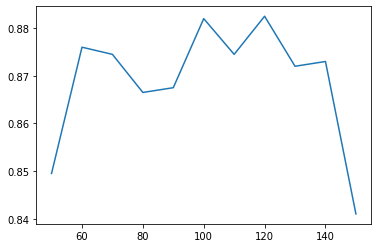

In [71]:
graph = pd.DataFrame({'batch_size':batch_size,'accuracy':accuracy})
plt.plot(graph['batch_size'],graph['accuracy'])

In [80]:
best_batch = graph['batch_size'].loc[graph['accuracy'] == max(graph['accuracy'])]
best_batch

7    120
Name: batch_size, dtype: int64

In [90]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', kernel_regularizer=keras.regularizers.l1_l2(.001), 
                  padding='same', input_shape=(32,32,3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=.5))
model.add(Dense(10))

early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])
history = model.fit(Xtrain, ytrain, epochs=100, batch_size=120,
                        validation_data=(Xvalid, yvalid),
                        callbacks=[early_stopping])
model.evaluate(Xtest, ytest)

Epoch 1/100
42/42 [==============================] - 4s 81ms/step - loss: 3.2906 - accuracy: 0.4974 - val_loss: 0.7777 - val_accuracy: 0.6378
Epoch 2/100
42/42 [==============================] - 3s 79ms/step - loss: 0.9903 - accuracy: 0.5612 - val_loss: 0.7407 - val_accuracy: 0.6696
Epoch 3/100
42/42 [==============================] - 3s 79ms/step - loss: 0.8769 - accuracy: 0.6208 - val_loss: 0.7240 - val_accuracy: 0.6696
Epoch 4/100
42/42 [==============================] - 3s 78ms/step - loss: 0.8130 - accuracy: 0.6410 - val_loss: 0.6793 - val_accuracy: 0.7272
Epoch 5/100
42/42 [==============================] - 3s 79ms/step - loss: 0.7657 - accuracy: 0.6750 - val_loss: 0.6709 - val_accuracy: 0.7130
Epoch 6/100
42/42 [==============================] - 3s 79ms/step - loss: 0.7278 - accuracy: 0.7008 - val_loss: 0.6253 - val_accuracy: 0.7608
Epoch 7/100
42/42 [==============================] - 3s 80ms/step - loss: 0.6940 - accuracy: 0.7172 - val_loss: 0.6275 - val_accuracy: 0.7610
Epoch 

[0.4660663306713104, 0.890999972820282]

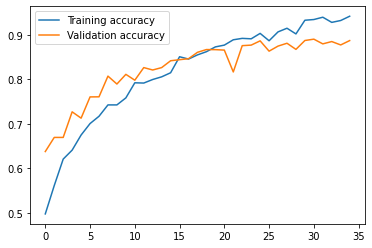

In [91]:
plt.plot(history.history['accuracy'], label='Training accuracy')

plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()

In [94]:
from sklearn.metrics import confusion_matrix, accuracy_score,\
    recall_score, precision_score, roc_curve, roc_auc_score
preds = model.predict_classes(Xtest, verbose=0)
ytest
preds



AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [85]:
tn, fp, fn, tp = confusion_matrix(ytest, preds).ravel()

ValueError: Classification metrics can't handle a mix of binary and unknown targets